# Machine Learning / Aprendizagem Automática

## Sara C. Madeira, 2019/20

# ML Project  - Learning about Pet Adoption using PetFinder.my Dataset

## Logistics

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. The notebook is both the solution and the report.**

**Decisions should be fundamented and results should be critically discussed.**

## Tools

The programmer should use [Python 3](https://www.python.org) and [Jupyter Notebook](http://jupyter.org), together with **[Scikit-learn](http://scikit-learn.org/stable/)**, **[Orange3](https://orange.biolab.si)**, or **both**.

**[Orange3](https://orange.biolab.si)** can be used through its **[programmatic version](https://docs.orange.biolab.si/3/data-mining-library/)**, by importing and using its packages, or throught its **workflow version**. 

**It is up to the programmer to decide when to use Scikit-learn, Orange, or both.**

In this context, your Jupyter notebook might have a mix of code, results, text explanations, workflow figures, etc. 

In case you use Orange/workflows for some tasks you should also deliver the workflow files and explain the options taken in each widget in your notebook.

**You can use this noteboook and the sections below as example.**

## Dataset

The dataset to be analysed is **`PetFinder_dataset.csv`**, made avaliable together with this project description. This dataset, downloaded from [Kaggle](https://www.kaggle.com), contains selected data from the following competition: [PetFinder.my Adoption Prediction](https://www.kaggle.com/c/petfinder-adoption-prediction/). 

PetFinder.my has been Malaysia’s leading animal welfare platform since 2008, with a database of more than 150,000 animals. PetFinder collaborates closely with animal lovers, media, corporations, and global organizations to improve animal welfare. Animal adoption rates are strongly correlated to the metadata associated with their online profiles, such as descriptive text and photo characteristics. As one example, PetFinder is currently experimenting with a simple AI tool called the Cuteness Meter, which ranks how cute a pet is based on qualities present in their photos. In this competition data scientist are supposed to develop algorithms to predict the adoptability of pets - specifically, how quickly is a pet adopted? If successful, they will be adapted into AI tools that will guide shelters and rescuers around the world on improving their pet profiles' appeal, reducing animal suffering and euthanization. 

**In this project, you are supposed to use only tabular data (not Images or Image Metadata) and see how far you can go in predicting and understanging PetFinder.my adoptions. You should use both supervised and unsupervised learning to tackled 2 tasks:**

1. **Task 1 (Supervised Learning) - Predicting Adoption and Adoption Speed**
2. **Task 2 (Unsupervised Learning) - Charactering Adopted Pets and Adoption Speed**

The **`PetFinder_dataset.csv`** you should learn from has **14.993 instances** described by **24 data fields** that you might use as **categorical/numerical features** and matches the `train.csv` file made available for the competition (https://www.kaggle.com/c/petfinder-adoption-prediction/data). **The target in the original Kaggle challenge is `Adoption Speed`.**

### File Descriptions

* **PetFinder_dataset.csv** - Tabular/text data for the training set
* **breed_labels.csv** - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.
* **color_labels.csv** - Contains ColorName for each ColorID
* **state_labels.csv** - Contains StateName for each StateID

### Data Fields

* **PetID** - Unique hash ID of pet profile
* **Type** - Type of animal (1 = Dog, 2 = Cat)
* **AdoptionSpeed - Categorical speed of adoption. Lower is faster.** This is the value to predict in the competition. See below section for more info.
* **Name** - Name of pet (Empty if not named)
* **Age** - Age of pet when listed, in months
* **Breed1** - Primary breed of pet (see `BreedLabels.csv` for details)
* **Breed2** - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
* **Gender** - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
* **Color1** - Color 1 of pet (see `ColorLabel.csv` for details)
* **Color2** - Color 2 of pet (see `ColorLabel.csv` for details)
* **Color3** - Color 3 of pet (see `ColorLabel.csv` for details)
* **MaturitySize** - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
* **FurLength** - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
* **Vaccinated** - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
* **Dewormed** - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
* **Sterilized** - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
* **Health** - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
* **Quantity** - Number of pets represented in profile
* **Fee** - Adoption fee (0 = Free)
* **State** - State location in Malaysia (Refer to StateLabels dictionary)
* **RescuerID** - Unique hash ID of rescuer
* **VideoAmt** - Total uploaded videos for this pet
* **PhotoAmt** - Total uploaded photos for this pet
* **Description** - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

### AdoptionSpeed

The value of `AdoptionSpeed` describes how quickly, if at all, a pet is adopted:
* 0 - Pet was adopted on the same day as it was listed. 
* 1 - Pet was adopted between 1 and 7 days (1st week) after being listed. 
* 2 - Pet was adopted between 8 and 30 days (1st month) after being listed. 
* 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
* 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

### **Important Notes on Data Cleaning and Preprocessing**

   1. Data can contain **errors/typos**, whose correction might improve the analysis.
   2. Some features can contain **many values**, whose grouping in categories (aggregation into bins) might improve the analysis.
   3. Data can contain **missing values**, that you might decide to fill. You might also decide to eliminate instances/features with high percentages of missing values.
   4. **Not all features are necessarily important** for the analysis.
   5. Depending on the analysis, **some features might have to be excluded**.
   6. Class distribution is an important characteristic of the dataset that should be checked. **Class imbalance** might impair machine learning.  
  
Some potentially useful links:

* Data Cleaning and Preprocessing in Scikit-learn: https://scikit-learn.org/stable/modules/preprocessing.html#
* Data Cleaning and Preprocessing in Orange: https://docs.biolab.si//3/visual-programming/widgets/data/preprocess.html
* Dealing with imbalance datasets: https://pypi.org/project/imbalanced-learn/ and https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#t7

## Task 0 (Know your Data) - Exploratory Data Analysis

## 0.1. Loading Data

In [7]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#import pandas_profiling
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
import itertools
from nltk import NaiveBayesClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
from sklearn.neighbors import KNeighborsClassifier
from textblob import TextBlob
from sklearn.ensemble import AdaBoostClassifier , VotingClassifier
from sklearn import preprocessing
from sklearn import tree
import warnings
import pydot
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE,ADASYN,SMOTENC
from collections import Counter
import random
from IPython.display import HTML, display
%matplotlib inline
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'textblob'

In [8]:
breed_labels = pd.read_csv("breed_labels.csv")
color_labels = pd.read_csv("color_labels.csv")
PetFinder_dataset = pd.read_csv("PetFinder_dataset.csv")
state_labels = pd.read_csv("state_labels.csv")

In [9]:
breed_labels.head(10)

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita
5,6,1,Alaskan Malamute
6,7,1,American Bulldog
7,8,1,American Eskimo Dog
8,9,1,American Hairless Terrier
9,10,1,American Staffordshire Terrier


In [10]:
color_labels.head(3)

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden


In [11]:
state_labels.head(3)

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan


In [12]:
PetFinder_dataset.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3


### Mapping string values against their actual values

In [13]:
PetFinder_dataset['Type'].replace(1, 'Dog',inplace=True)
PetFinder_dataset['Type'].replace(2, 'Cat',inplace=True)
PetFinder_dataset.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,Cat,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,Cat,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,Dog,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3


In [14]:
PetFinder_dataset['Breed1'] = PetFinder_dataset['Breed1'].map(breed_labels.set_index('BreedID')['BreedName'])
PetFinder_dataset['Breed2'] = PetFinder_dataset['Breed2'].map(breed_labels.set_index('BreedID')['BreedName'])
PetFinder_dataset.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,Cat,Nibble,3,Tabby,NaN,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,Cat,No Name Yet,1,Domestic Medium Hair,NaN,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,Dog,Brisco,1,Mixed Breed,NaN,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3


In [15]:
PetFinder_dataset['Gender'].replace(1, 'Male',inplace=True)
PetFinder_dataset['Gender'].replace(2, 'Female',inplace=True)
PetFinder_dataset['Gender'].replace(3, 'Mixed',inplace=True)

In [17]:
PetFinder_dataset['Color1'] = PetFinder_dataset['Color1'].map(color_labels.set_index('ColorID')['ColorName'])
PetFinder_dataset['Color2'] = PetFinder_dataset['Color2'].map(color_labels.set_index('ColorID')['ColorName'])
PetFinder_dataset['Color3'] = PetFinder_dataset['Color3'].map(color_labels.set_index('ColorID')['ColorName'])

In [18]:
PetFinder_dataset['MaturitySize'].replace(0, 'Not Specified',inplace=True)
PetFinder_dataset['MaturitySize'].replace(1, 'Small',inplace=True)
PetFinder_dataset['MaturitySize'].replace(2, 'Medium',inplace=True)
PetFinder_dataset['MaturitySize'].replace(3, 'Large',inplace=True)
PetFinder_dataset['MaturitySize'].replace(4, 'Extra Large',inplace=True)

In [19]:
PetFinder_dataset['FurLength'].replace(0, 'Not Specified',inplace=True)
PetFinder_dataset['FurLength'].replace(1, 'Short',inplace=True)
PetFinder_dataset['FurLength'].replace(2, 'Medium',inplace=True)
PetFinder_dataset['FurLength'].replace(3, 'Long',inplace=True)

In [20]:
PetFinder_dataset['Vaccinated'].replace(1, 'Yes',inplace=True)
PetFinder_dataset['Vaccinated'].replace(2, 'No',inplace=True)
PetFinder_dataset['Vaccinated'].replace(3, 'Not Sure',inplace=True)

In [21]:
PetFinder_dataset['Dewormed'].replace(1, 'Yes',inplace=True)
PetFinder_dataset['Dewormed'].replace(2, 'No',inplace=True)
PetFinder_dataset['Dewormed'].replace(3, 'Not Sure',inplace=True)

In [22]:
PetFinder_dataset['Sterilized'].replace(1, 'Yes',inplace=True)
PetFinder_dataset['Sterilized'].replace(2, 'No',inplace=True)
PetFinder_dataset['Sterilized'].replace(3, 'Not Sure',inplace=True)

In [23]:
PetFinder_dataset['Health'].replace(0, 'Not Specified',inplace=True)
PetFinder_dataset['Health'].replace(1, 'Healthy',inplace=True)
PetFinder_dataset['Health'].replace(2, 'Minor Injury',inplace=True)
PetFinder_dataset['Health'].replace(3, 'Serious Injury',inplace=True)

In [24]:
PetFinder_dataset['State'] = PetFinder_dataset['State'].map(state_labels.set_index('StateID')['StateName'])

In [25]:
PetFinder_dataset.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,Cat,Nibble,3,Tabby,NaN,Male,NaN,NaN,NaN,Small,...,Healthy,1,100,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,Cat,No Name Yet,1,Domestic Medium Hair,NaN,Male,NaN,NaN,NaN,Medium,...,Healthy,1,0,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,Dog,Brisco,1,Mixed Breed,NaN,Male,NaN,NaN,NaN,Medium,...,Healthy,1,0,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3


## 0.2. Understanding Data

In this task you should **understand better the features**, their distribution of values, potential errors, etc and plan/describe what data preprocessing steps should be performed next. Very important also is the distribution of values in the target (class distribution). 

Here you can find a notebook with some examples of what you can do in **Exploratory Data Analysis**: https://www.kaggle.com/artgor/exploration-of-data-step-by-step/notebook. You can also use Orange widgets for this.

...

## Task 1 (Supervised Learning) - Predicting Adoption and Adoption Speed

In this task you should target 3 classification tasks:
1. **Predicting  Adoption (binary classification task)**: create a new target from AdoptionSpeed that is 1 if AdoptionSpeed <> 4 and 0 otherwise.
2. **Predicting AdoptionSpeed (multiclass classification)**: in this task you should you the original target AdoptionSpeed, whose values are in the set {0, 1, 2, 3 , 4} (5 classes). This is a very difficult problem. You might also want to consider 3 classes (for instance {0-1, 2-3, 4}, or other sets that make sense). 
3. **Train specialized models for cats and dogs**: train with cat/dog instances and check whether the classification performance changes when Predicting Adoption and Predicting AdoptionSpeed.

**You should:**

* Choose **one classifier in each category**: Tree models, Rule models, Linear models, Distance-based models, and Probabilistic models.
* Use cross-validation to evaluate the results. 
* Present and discuss the results for different evaluation measures, present confusion matrices. Remember that not only overall results are important. Check what happens when learning to predict each class.
* Describe the parameters used for each classifier and how their choice impacted or not the results.
* Choose the best classifier and fundament you choice.
* **Discuss critically your choices and the results!**

## 1.1. Preprocessing Data for Classification
We will create new attributes based on the initial attributes, with the following purposes:
- Reduce cardinality, applicable for Breed1 and Breed2 fields. In the case of Colorx attributes, we will keep Color1 and create a new attribute Ismulticolor that will be describe all instances where Color2 and Color3 have a value.
- Extract information from "free for all" fields like Name and Description, e.g.:
    - using textblob to extract Polarity and Subjectivity from Descriptor attribute as well as number of words.
    - create a binary attribute Hasname for all instances where name is meaningfull
- Create bins for numerical variables in order to enable the processing of numerical attributes as categorical ones
In this section we will also check for missing values

In [26]:
PetFinder_dataset.shape

(14993, 24)

In [27]:
PetFinder_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  object 
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14988 non-null  object 
 4   Breed2         4231 non-null   object 
 5   Gender         14993 non-null  object 
 6   Color1         0 non-null      object 
 7   Color2         0 non-null      object 
 8   Color3         0 non-null      object 
 9   MaturitySize   14993 non-null  object 
 10  FurLength      14993 non-null  object 
 11  Vaccinated     14993 non-null  object 
 12  Dewormed       14993 non-null  object 
 13  Sterilized     14993 non-null  object 
 14  Health         14993 non-null  object 
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  object 
 18  Rescue

In [28]:
PetFinder_dataset.describe()

,Age,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10.452078,1.576069,21.259988,0.056760,3.889215,2.516441
std,18.155790,1.472477,78.414548,0.346185,3.487810,1.177265
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,2.000000,2.000000
50%,3.000000,1.000000,0.000000,0.000000,3.000000,2.000000
75%,12.000000,1.000000,0.000000,0.000000,5.000000,4.000000
max,255.000000,20.000000,3000.000000,8.000000,30.000000,4.000000


In [29]:
PetFinder_dataset.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [30]:
PetFinder_dataset.duplicated(['PetID']).any()

False

In [31]:
PetFinder_dataset.isnull().sum()

Type                 0
Name              1257
Age                  0
Breed1               5
Breed2           10762
Gender               0
Color1           14993
Color2           14993
Color3           14993
MaturitySize         0
FurLength            0
Vaccinated           0
Dewormed             0
Sterilized           0
Health               0
Quantity             0
Fee                  0
State                0
RescuerID            0
VideoAmt             0
Description         12
PetID                0
PhotoAmt             0
AdoptionSpeed        0
dtype: int64

Turn Name attribute into something, that might be useful

In [36]:
# Step 1, deal with empty fields
PetFinder_dataset['Name'] = PetFinder_dataset['Name'].fillna('Unnamed')
# Check the number of length < 3 names. For sure that every name with 2 or less characters is not really a name!
PetFinder_dataset[PetFinder_dataset['Name'].apply(lambda x: len(str(x))) < 3]['Name'].count()
# Step 2 - Replace the names with length < 3 by 'Unnamed'
PetFinder_dataset['Name'] = PetFinder_dataset['Name'].mask(PetFinder_dataset['Name'].str.len() < 3,'Unnamed')
# Step 3 - Replace all names containing substrings 'name'
regexp='no name|noname|nameless|not name|unamed|not yet name|to be name|unnamed|name us|name them|name me'
PetFinder_dataset['Name']=PetFinder_dataset['Name'].mask(PetFinder_dataset['Name'].str.contains(regexp,case=False,regex=True),'Unnamed')
PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'Hasname',0)
PetFinder_dataset.loc[(PetFinder_dataset['Name'] != 'Unnamed'),'Hasname']=1

ValueError: cannot insert Hasname, already exists

Copy the value of Breed2 to Breed1 on all instances where Breed2 has a valid value and Breed1 does not.
Remove all references to Hair length from the breed, thus reducing the cardinality of the breed attributes. We then assume that hair length will be captured by the FurLength attribute solely.
Merge Breed1 and Breed2 into one new Breed Attribute with value:
- 'Mixed Breed' whenever Breed1 and Breed2 are different,
- Breed1 otherwise

In [35]:
# Copy Breed2 to Breed1 on the instances where Breed1 is NaN and Breed2 is not
PetFinder_dataset.loc[(PetFinder_dataset['Breed1'].isna() & PetFinder_dataset['Breed2'].notna()),'Breed1']= PetFinder_dataset.loc[(PetFinder_dataset['Breed1'].isna() & PetFinder_dataset['Breed2'].notna()),'Breed2'] 
regexp=' long hair| short hair| medium hair'
PetFinder_dataset['Breed1']=PetFinder_dataset['Breed1'].str.replace(regexp,'',case=False,regex=True)
PetFinder_dataset['Breed2']=PetFinder_dataset['Breed2'].str.replace(regexp,'',case=False,regex=True)
PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'Breed',PetFinder_dataset['Breed1'])
PetFinder_dataset.loc[(PetFinder_dataset['Breed1'] != PetFinder_dataset['Breed2']) & (PetFinder_dataset['Breed2'].notna()),'Breed']='Mixed Breed'

ValueError: cannot insert Breed, already exists

Further treat Breed Attribute, setting it to:
 - Purebreed if (Breed <> 'Mixed Breed' & Breed <> 'Domestic') reducing the cardinality of the attribute to 3:
 - Mixed Breed, Purebreed, Domestic (since the latter one is not really a breed)

In [37]:
# PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'Purebreed',"1")
# PetFinder_dataset.loc[(PetFinder_dataset['Breed'] == 'Mixed Breed'),'Purebreed']="0"
PetFinder_dataset.loc[(PetFinder_dataset['Breed'] != 'Mixed Breed') & (PetFinder_dataset['Breed'] != 'Domestic') ,'Breed']="Purebreed"

In an attempt to balance granularity against cardinality of the Color attributes we merged Color1/2/3 into one new Color Attribute with value:
- Color1+"Other" whenever Color2 and Color3 are not NaN,
- Color1 otherwise

In [38]:
PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'Color',PetFinder_dataset['Color1'])
PetFinder_dataset.loc[PetFinder_dataset['Color2'].notna() | PetFinder_dataset['Color3'].notna(),'Color']=PetFinder_dataset.loc[PetFinder_dataset['Color2'].notna() | PetFinder_dataset['Color3'].notna(),'Color1'] + "Other"

In [39]:
PetFinder_dataset.head(10)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,Hasname,Breed,Color,AdoptionSpeed
0,Cat,Nibble,3,Tabby,NaN,Male,NaN,NaN,NaN,Small,...,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,1,Purebreed,NaN,2
1,Cat,Unnamed,1,Domestic,NaN,Male,NaN,NaN,NaN,Medium,...,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,Domestic,NaN,0
2,Dog,Brisco,1,Mixed Breed,NaN,Male,NaN,NaN,NaN,Medium,...,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,1,Mixed Breed,NaN,3
3,Dog,Miko,4,Mixed Breed,NaN,Female,NaN,NaN,NaN,Medium,...,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,1,Mixed Breed,NaN,2
4,Dog,Hunter,1,Mixed Breed,NaN,Male,NaN,NaN,NaN,Medium,...,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,1,Mixed Breed,NaN,2
5,Cat,Unnamed,3,Domestic,NaN,Female,NaN,NaN,NaN,Medium,...,Selangor,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,0,Domestic,NaN,2
6,Cat,BULAT,12,Domestic,Domestic,Male,NaN,NaN,NaN,Medium,...,Selangor,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,Domestic,NaN,1
7,Dog,Siu Pak & Her 6 Puppies,0,Mixed Breed,NaN,Female,NaN,NaN,NaN,Medium,...,Selangor,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,1,Mixed Breed,NaN,3
8,Cat,Unnamed,2,Domestic,NaN,Female,NaN,NaN,NaN,Medium,...,Selangor,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,0,Domestic,NaN,1
9,Cat,Kitty,12,Domestic,NaN,Female,NaN,NaN,NaN,Medium,...,Selangor,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,1,Domestic,NaN,4


In [40]:
#PetFinder_dataset[['Color1', 'Color2' , 'Color3']].replace(np.nan, '', regex=False, inplace=True)
#PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'Color',PetFinder_dataset['Color1'].replace(np.nan,'',regex=True) + PetFinder_dataset['Color2'].replace(np.nan,'',regex=True) + PetFinder_dataset['Color3'].replace(np.nan,'',regex=True))

In [41]:
PetFinder_dataset

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,Hasname,Breed,Color,AdoptionSpeed
0,Cat,Nibble,3,Tabby,NaN,Male,NaN,NaN,NaN,Small,...,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,1,Purebreed,NaN,2
1,Cat,Unnamed,1,Domestic,NaN,Male,NaN,NaN,NaN,Medium,...,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,Domestic,NaN,0
2,Dog,Brisco,1,Mixed Breed,NaN,Male,NaN,NaN,NaN,Medium,...,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,1,Mixed Breed,NaN,3
3,Dog,Miko,4,Mixed Breed,NaN,Female,NaN,NaN,NaN,Medium,...,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,1,Mixed Breed,NaN,2
4,Dog,Hunter,1,Mixed Breed,NaN,Male,NaN,NaN,NaN,Medium,...,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,1,Mixed Breed,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,Cat,Unnamed,2,Domestic,NaN,Mixed,NaN,NaN,NaN,Medium,...,Selangor,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,0,Domestic,NaN,2
14989,Cat,Serato & Eddie,60,Domestic,Domestic,Mixed,NaN,NaN,NaN,Medium,...,Selangor,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,1,Domestic,NaN,4
14990,Cat,Monkies,2,Domestic,Domestic,Mixed,NaN,NaN,NaN,Large,...,Selangor,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,1,Domestic,NaN,3
14991,Cat,Ms Daym,9,Domestic,NaN,Female,NaN,NaN,NaN,Small,...,Johor,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,1,Domestic,NaN,4


Analyse Description attribute using Textblob sentiment. It will create two new attributes:
subjectivity and polarity.

In [42]:
PetFinder_dataset

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,Hasname,Breed,Color,AdoptionSpeed
0,Cat,Nibble,3,Tabby,NaN,Male,NaN,NaN,NaN,Small,...,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,1,Purebreed,NaN,2
1,Cat,Unnamed,1,Domestic,NaN,Male,NaN,NaN,NaN,Medium,...,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,Domestic,NaN,0
2,Dog,Brisco,1,Mixed Breed,NaN,Male,NaN,NaN,NaN,Medium,...,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,1,Mixed Breed,NaN,3
3,Dog,Miko,4,Mixed Breed,NaN,Female,NaN,NaN,NaN,Medium,...,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,1,Mixed Breed,NaN,2
4,Dog,Hunter,1,Mixed Breed,NaN,Male,NaN,NaN,NaN,Medium,...,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,1,Mixed Breed,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,Cat,Unnamed,2,Domestic,NaN,Mixed,NaN,NaN,NaN,Medium,...,Selangor,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,0,Domestic,NaN,2
14989,Cat,Serato & Eddie,60,Domestic,Domestic,Mixed,NaN,NaN,NaN,Medium,...,Selangor,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,1,Domestic,NaN,4
14990,Cat,Monkies,2,Domestic,Domestic,Mixed,NaN,NaN,NaN,Large,...,Selangor,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,1,Domestic,NaN,3
14991,Cat,Ms Daym,9,Domestic,NaN,Female,NaN,NaN,NaN,Small,...,Johor,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,1,Domestic,NaN,4


In [43]:
PetFinder_dataset['Description'] = PetFinder_dataset['Description'].replace(np.nan, '', regex=True)
temp=PetFinder_dataset['Description'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'Polarity',temp[0])
PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'Subjectivity',temp[1])


NameError: name 'TextBlob' is not defined

Further create a new attribute containing the number of words in the description

In [34]:
PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'DescWords',pd.Series(PetFinder_dataset['Description'].apply(lambda x: len(x.split()))))

In [35]:
PetFinder_dataset.head(10)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Description,PetID,PhotoAmt,Hasname,Breed,Color,Polarity,Subjectivity,DescWords,AdoptionSpeed
0,Cat,Nibble,3,Tabby,NaN,Male,Black,White,NaN,Small,...,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,1,Purebreed,BlackOther,0.130357,0.407143,69,2
1,Cat,Unnamed,1,Domestic,NaN,Male,Black,Brown,NaN,Medium,...,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,Domestic,BlackOther,0.100000,0.400000,23,0
2,Dog,Brisco,1,Mixed Breed,NaN,Male,Brown,White,NaN,Medium,...,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,1,Mixed Breed,BrownOther,0.261905,0.542857,69,3
3,Dog,Miko,4,Mixed Breed,NaN,Female,Black,Brown,NaN,Medium,...,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,1,Mixed Breed,BlackOther,0.341146,0.437500,25,2
4,Dog,Hunter,1,Mixed Breed,NaN,Male,Black,NaN,NaN,Medium,...,This handsome yet cute boy is up for adoption....,850a43f90,3.0,1,Mixed Breed,Black,0.400000,0.743750,81,2
5,Cat,Unnamed,3,Domestic,NaN,Female,Cream,Gray,NaN,Medium,...,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,0,Domestic,CreamOther,0.000000,0.000000,18,2
6,Cat,BULAT,12,Domestic,Domestic,Male,Black,NaN,NaN,Medium,...,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,Domestic,Black,0.250000,0.390000,78,1
7,Dog,Siu Pak & Her 6 Puppies,0,Mixed Breed,NaN,Female,Black,Brown,White,Medium,...,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,1,Mixed Breed,BlackOther,0.125000,0.250000,20,3
8,Cat,Unnamed,2,Domestic,NaN,Female,Gray,NaN,NaN,Medium,...,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,0,Domestic,Gray,0.038889,0.662963,13,1
9,Cat,Kitty,12,Domestic,NaN,Female,Black,White,NaN,Medium,...,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,1,Domestic,BlackOther,0.213750,0.511250,45,4


### Generate categorical attributes by binning numerical attributes.
Points worth noting:
- Age has been binned with 3 categories:
    - Newlyborn/Junior/Mature
- FeeBin, tries to split the values in three categories, according the normal fee for a pet aquired in a shelter. This information was taken from http://www.focusmalaysia.my/income/the-cost-of-having-a-pet:
    - "Really" Free pets
    - Normal price pets, Fee < 300
    - Expensive pets, Fee > 300
- PhotoAmtBin, splits the numerical values in 3 categories, No/few/lot of photos
- For the other 3 numerical Attributes, qcut was used, to create 10 categories corresponding to the deciles. 

In [36]:
#PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'AgeBin',pd.cut(PetFinder_dataset['Age'], [-0.01, 6, 12,18 , 24 , 30 ,36 , 42,48,54 , 60 , PetFinder_dataset['Age'].max()]))
PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'AgeBin',pd.cut(PetFinder_dataset['Age'], [-0.1, 3, 12,PetFinder_dataset['Age'].max()]))
PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'FeeBin',pd.cut(PetFinder_dataset['Fee'], [-0.1, 0, 300,PetFinder_dataset['Fee'].max()]))
# PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'Free','Free')
# PetFinder_dataset.loc[(PetFinder_dataset['Fee'] > 0),'Free']='NotFree'
bins = pd.IntervalIndex.from_tuples([(-0.1, 0.99), (0.99, 3.99), (3.99, PetFinder_dataset['PhotoAmt'].max())])
PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'PhotoAmtBin',pd.cut(PetFinder_dataset['PhotoAmt'],bins))
PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'PolarityBin',pd.qcut(PetFinder_dataset['Polarity'],10))
PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'SubjectivityBin',pd.qcut(PetFinder_dataset['Subjectivity'],10))
PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'DescwordsBin',pd.qcut(PetFinder_dataset['DescWords'],10))

### Generate Adopted target for binary classification

In [45]:
PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'Adopted',PetFinder_dataset['AdoptionSpeed'].apply(lambda x: str(x < 4)))

In [46]:
PetFinder_dataset.head(10)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,RescuerID,VideoAmt,Description,PetID,PhotoAmt,Hasname,Breed,Color,Adopted,AdoptionSpeed
0,Cat,Nibble,3,Tabby,NaN,Male,NaN,NaN,NaN,Small,...,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,1,Purebreed,NaN,True,2
1,Cat,Unnamed,1,Domestic,NaN,Male,NaN,NaN,NaN,Medium,...,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,Domestic,NaN,True,0
2,Dog,Brisco,1,Mixed Breed,NaN,Male,NaN,NaN,NaN,Medium,...,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,1,Mixed Breed,NaN,True,3
3,Dog,Miko,4,Mixed Breed,NaN,Female,NaN,NaN,NaN,Medium,...,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,1,Mixed Breed,NaN,True,2
4,Dog,Hunter,1,Mixed Breed,NaN,Male,NaN,NaN,NaN,Medium,...,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,1,Mixed Breed,NaN,True,2
5,Cat,Unnamed,3,Domestic,NaN,Female,NaN,NaN,NaN,Medium,...,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,0,Domestic,NaN,True,2
6,Cat,BULAT,12,Domestic,Domestic,Male,NaN,NaN,NaN,Medium,...,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,Domestic,NaN,True,1
7,Dog,Siu Pak & Her 6 Puppies,0,Mixed Breed,NaN,Female,NaN,NaN,NaN,Medium,...,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,1,Mixed Breed,NaN,True,3
8,Cat,Unnamed,2,Domestic,NaN,Female,NaN,NaN,NaN,Medium,...,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,0,Domestic,NaN,True,1
9,Cat,Kitty,12,Domestic,NaN,Female,NaN,NaN,NaN,Medium,...,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,1,Domestic,NaN,False,4


## A Complete Overview of Dataset and It's detailed Analysis

In [47]:
profile = PetFinder_dataset.profile_report()
profile

AttributeError: 'DataFrame' object has no attribute 'profile_report'

### Initial Analysis of the dataset
Key factors to note:
- Binary classification (Adopted) is highly imbalanced
- Multi class (AdoptionSpeed) is imbalanced.
- VideoAmt has high percentage of Zero values (96,2%) and is correlated with PhotoAmt. It will be discarded.
- In general, high cardinality attributes will be discarded.e.g.:
    - Breed1/2
    - Name
    - Description

### Analysis of the influence of each attribute in Adoption/Adoption Speed
For the Adoption Binary classification problem, the dataset is imbalanced in terms of target classes. As such, we will undersample the majority class before analysing the realtive frequence of each target class against each attribute.
We will repeat the sampling process several times (twenty) to average out fluctuations in the sampling process.

### Perform random undersampling of the Majority class with replacement 

In [40]:
PetFinder_dataset_us = pd.concat([PetFinder_dataset[PetFinder_dataset['Adopted']=='False'], 
    PetFinder_dataset[PetFinder_dataset['Adopted']=='True'].sample(n=PetFinder_dataset[PetFinder_dataset['Adopted']=='False']['Adopted'].count(), replace=False, random_state=None)])
for i in range(19):
    PetFinder_dataset_us = PetFinder_dataset_us.append(pd.concat([PetFinder_dataset[PetFinder_dataset['Adopted']=='False'], 
        PetFinder_dataset[PetFinder_dataset['Adopted']=='True'].sample(n=PetFinder_dataset[PetFinder_dataset['Adopted']=='False']['Adopted'].count(), replace=False, random_state=None)]))
print('Dataset Shape-',PetFinder_dataset_us.shape)
print('Attributes',PetFinder_dataset_us.columns)

Dataset Shape- (167880, 37)
Attributes Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'Hasname', 'Breed',
       'Color', 'Polarity', 'Subjectivity', 'DescWords', 'AgeBin', 'FeeBin',
       'PhotoAmtBin', 'PolarityBin', 'SubjectivityBin', 'DescwordsBin',
       'Adopted', 'AdoptionSpeed'],
      dtype='object')


### Binary Classification

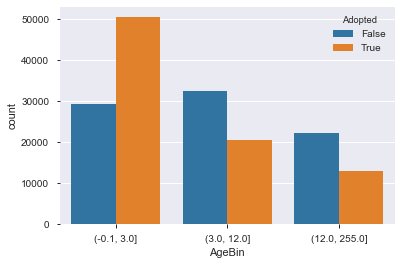

In [41]:
sns.countplot(x=PetFinder_dataset_us['AgeBin'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

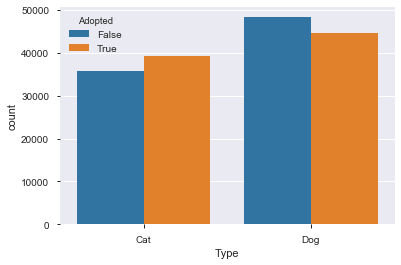

In [42]:
sns.countplot(x=PetFinder_dataset_us['Type'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

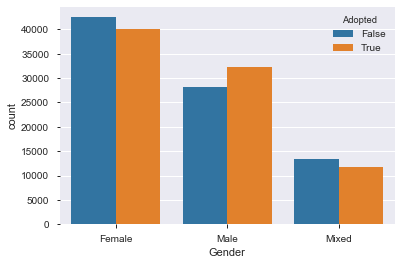

In [43]:
sns.countplot(x=PetFinder_dataset_us['Gender'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

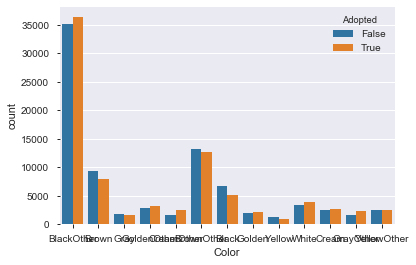

In [44]:
sns.countplot(x=PetFinder_dataset_us['Color'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

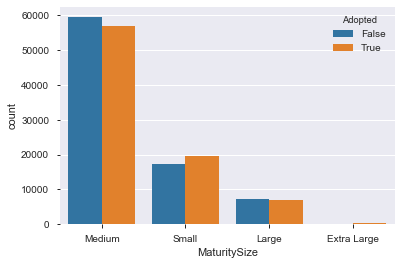

In [45]:
sns.countplot(x=PetFinder_dataset_us['MaturitySize'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

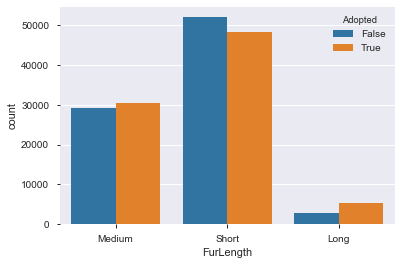

In [46]:
sns.countplot(x=PetFinder_dataset_us['FurLength'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

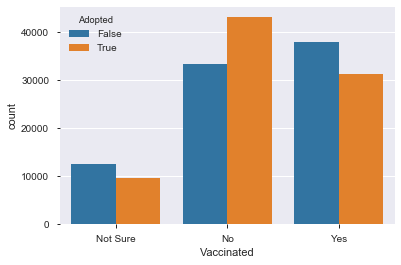

In [47]:
sns.countplot(x=PetFinder_dataset_us['Vaccinated'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

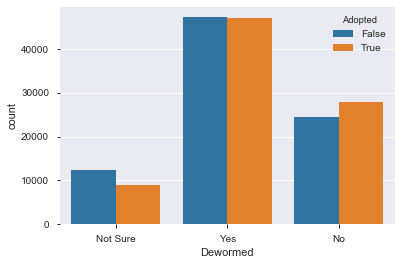

In [48]:
sns.countplot(x=PetFinder_dataset_us['Dewormed'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

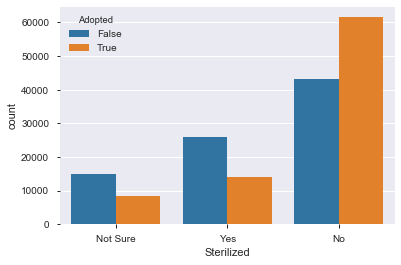

In [49]:
sns.countplot(x=PetFinder_dataset_us['Sterilized'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

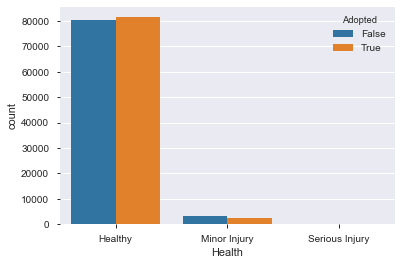

In [50]:
sns.countplot(x=PetFinder_dataset_us['Health'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

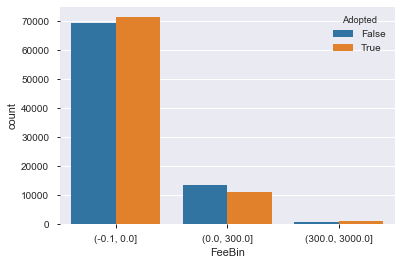

In [51]:
sns.countplot(x=PetFinder_dataset_us['FeeBin'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

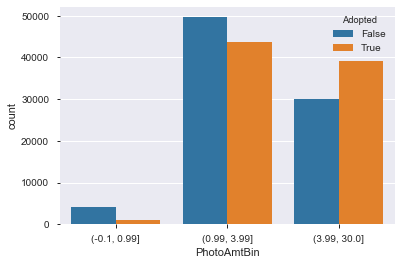

In [52]:
sns.countplot(x=PetFinder_dataset_us['PhotoAmtBin'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

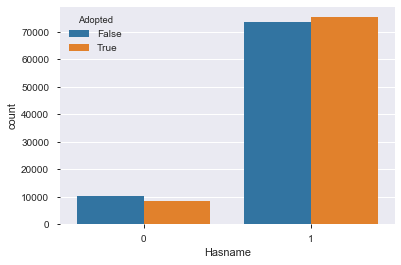

In [53]:
sns.countplot(x=PetFinder_dataset_us['Hasname'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

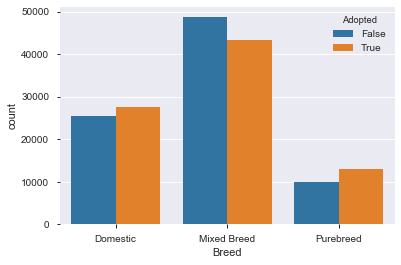

In [54]:
sns.countplot(x=PetFinder_dataset_us['Breed'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

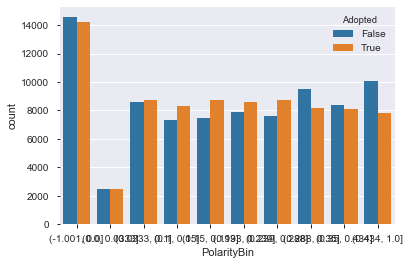

In [55]:
sns.countplot(x=PetFinder_dataset_us['PolarityBin'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

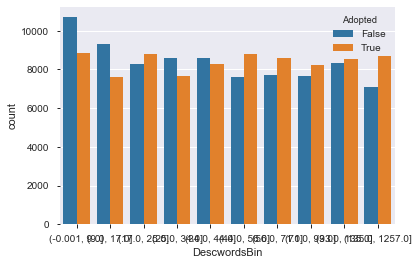

In [56]:
sns.countplot(x=PetFinder_dataset_us['DescwordsBin'],hue=PetFinder_dataset_us['Adopted'])
plt.show()

### Multiclass problem analysis with 3 classes
Class 0 and class 1 and 2 will be merged, turning the 5 classes problem into a 3 class one.

In [57]:
PetFinder_dataset=PetFinder_dataset.rename(columns={"AdoptionSpeed": "InitialAdoptionSpeed"})
PetFinder_dataset.insert(PetFinder_dataset.shape[1]-1,'AdoptionSpeed',PetFinder_dataset['InitialAdoptionSpeed'])

In [58]:
PetFinder_dataset['AdoptionSpeed'] = pd.cut(PetFinder_dataset['InitialAdoptionSpeed'], [0,2,3,4], labels=['instant adoption', 'delayed adoption' ,'very late adoption'] , include_lowest =True)

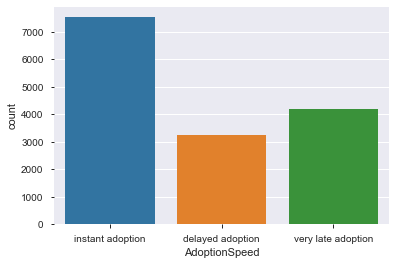

In [59]:
sns.countplot(x=PetFinder_dataset['AdoptionSpeed'])
plt.show()

In [60]:
PetFinder_dataset

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,DescWords,AgeBin,FeeBin,PhotoAmtBin,PolarityBin,SubjectivityBin,DescwordsBin,Adopted,AdoptionSpeed,InitialAdoptionSpeed
0,Cat,Nibble,3,Tabby,NaN,Male,Black,White,NaN,Small,...,69,"(-0.1, 3.0]","(0.0, 300.0]","(0.99, 3.99]","(0.1, 0.15]","(0.379, 0.442]","(56.0, 71.0]",True,instant adoption,2
1,Cat,Unnamed,1,Domestic,NaN,Male,Black,Brown,NaN,Medium,...,23,"(-0.1, 3.0]","(-0.1, 0.0]","(0.99, 3.99]","(0.0333, 0.1]","(0.379, 0.442]","(17.0, 25.0]",True,instant adoption,0
2,Dog,Brisco,1,Mixed Breed,NaN,Male,Brown,White,NaN,Medium,...,69,"(-0.1, 3.0]","(-0.1, 0.0]","(3.99, 30.0]","(0.239, 0.288]","(0.521, 0.562]","(56.0, 71.0]",True,delayed adoption,3
3,Dog,Miko,4,Mixed Breed,NaN,Female,Black,Brown,NaN,Medium,...,25,"(3.0, 12.0]","(0.0, 300.0]","(3.99, 30.0]","(0.288, 0.35]","(0.379, 0.442]","(17.0, 25.0]",True,instant adoption,2
4,Dog,Hunter,1,Mixed Breed,NaN,Male,Black,NaN,NaN,Medium,...,81,"(-0.1, 3.0]","(-0.1, 0.0]","(0.99, 3.99]","(0.35, 0.434]","(0.734, 1.0]","(71.0, 93.0]",True,instant adoption,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,Cat,Unnamed,2,Domestic,NaN,Mixed,Black,NaN,NaN,Medium,...,78,"(-0.1, 3.0]","(-0.1, 0.0]","(0.99, 3.99]","(0.288, 0.35]","(0.379, 0.442]","(71.0, 93.0]",True,instant adoption,2
14989,Cat,Serato & Eddie,60,Domestic,Domestic,Mixed,Black,Yellow,White,Medium,...,31,"(12.0, 255.0]","(-0.1, 0.0]","(0.99, 3.99]","(0.15, 0.193]","(0.2, 0.379]","(25.0, 34.0]",False,very late adoption,4
14990,Cat,Monkies,2,Domestic,Domestic,Mixed,Cream,Gray,White,Large,...,9,"(-0.1, 3.0]","(0.0, 300.0]","(3.99, 30.0]","(0.434, 1.0]","(0.6, 0.65]","(-0.001, 9.0]",True,delayed adoption,3
14991,Cat,Ms Daym,9,Domestic,NaN,Female,Yellow,White,NaN,Small,...,18,"(3.0, 12.0]","(-0.1, 0.0]","(0.99, 3.99]","(0.434, 1.0]","(0.6, 0.65]","(17.0, 25.0]",False,very late adoption,4


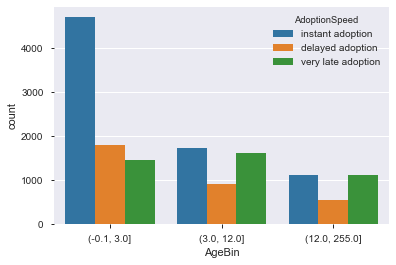

In [61]:
sns.countplot(x=PetFinder_dataset['AgeBin'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

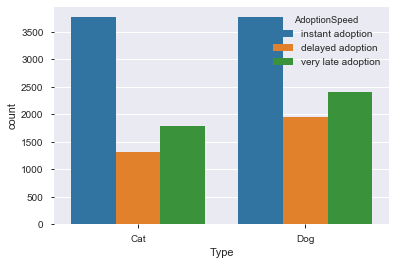

In [62]:
sns.countplot(x=PetFinder_dataset['Type'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

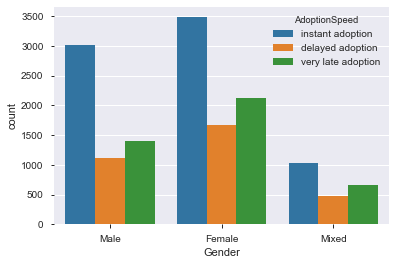

In [63]:
sns.countplot(x=PetFinder_dataset['Gender'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

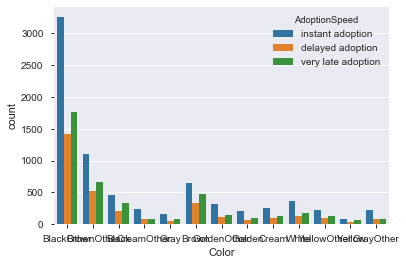

In [64]:
sns.countplot(x=PetFinder_dataset['Color'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

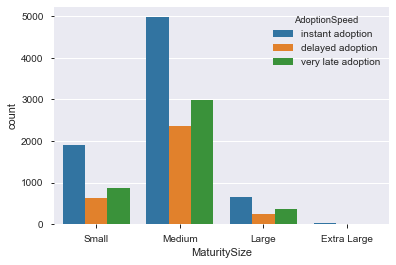

In [65]:
sns.countplot(x=PetFinder_dataset['MaturitySize'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

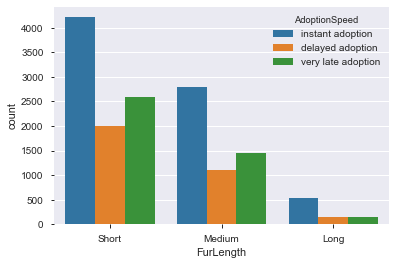

In [66]:
sns.countplot(x=PetFinder_dataset['FurLength'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

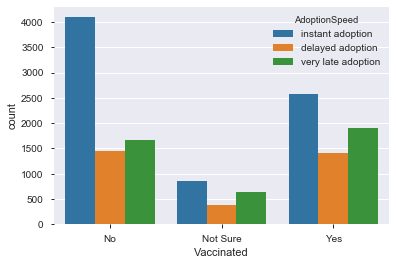

In [67]:
sns.countplot(x=PetFinder_dataset['Vaccinated'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

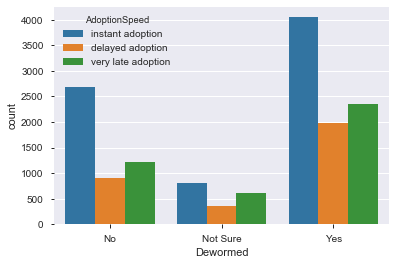

In [68]:
sns.countplot(x=PetFinder_dataset['Dewormed'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

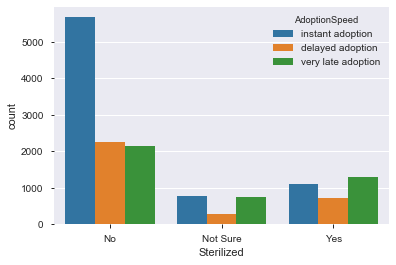

In [69]:
sns.countplot(x=PetFinder_dataset['Sterilized'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

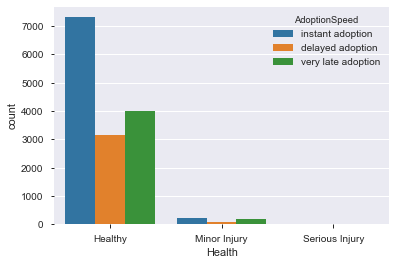

In [70]:
sns.countplot(x=PetFinder_dataset['Health'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

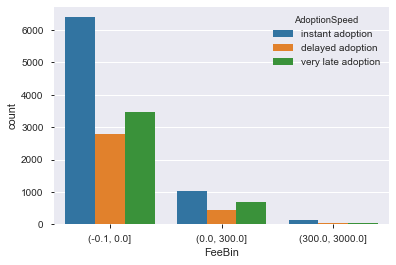

In [71]:
sns.countplot(x=PetFinder_dataset['FeeBin'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

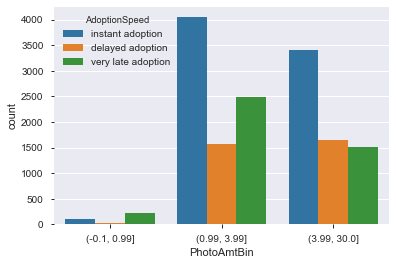

In [72]:
sns.countplot(x=PetFinder_dataset['PhotoAmtBin'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

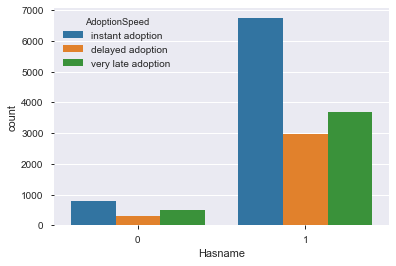

In [73]:
sns.countplot(x=PetFinder_dataset['Hasname'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

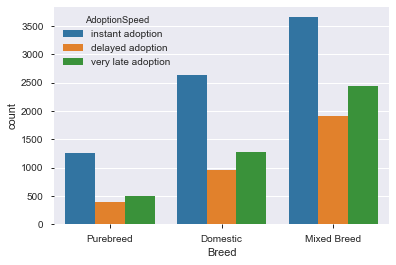

In [74]:
sns.countplot(x=PetFinder_dataset['Breed'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

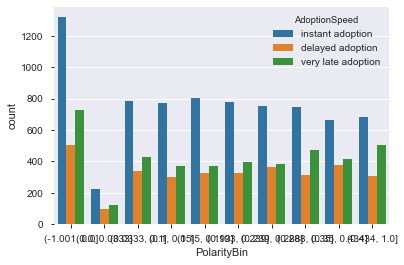

In [75]:
sns.countplot(x=PetFinder_dataset['PolarityBin'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

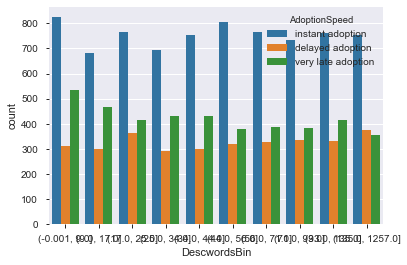

In [76]:
sns.countplot(x=PetFinder_dataset['DescwordsBin'],hue=PetFinder_dataset['AdoptionSpeed'])
plt.show()

### Attributes selected for the model
- Type
- AgeBin or Age (selected in the Task notebook)
- Gender
- Color
- MaturitySize
- FurLength
- Vaccinated
- Dewormed
- Sterilized
- Quantity
- FeeBin or Fee (selected in the Task notebook)
- PhotoAmtBin or PhotoAmt (selected in the Task notebook)
- PolarityBin or Polarity (selected in the Task notebook)
- DescwordsBin or DescWords (selected in the Task notebook)
- Subjectivity or SubjectivityBin (selected in the Task notebook)
- Health
- Hasname
- State
### Attributes discarded
- Name
- Breed1/2
- Color1/2/3
- RescuerID
- VideoAmt
- Description
- PetID
### Instances to be discarded
All instances where the Quantity attribute is greater than 2 will be discarded. the rationale being the fact that one can't describe a "bunch" of pets in a single a line!


In [77]:
PetFinder_dataset.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'Hasname', 'Breed',
       'Color', 'Polarity', 'Subjectivity', 'DescWords', 'AgeBin', 'FeeBin',
       'PhotoAmtBin', 'PolarityBin', 'SubjectivityBin', 'DescwordsBin',
       'Adopted', 'AdoptionSpeed', 'InitialAdoptionSpeed'],
      dtype='object')

Select the attributes to be used in the model and output to a csv file to be further used on Task Notebooks

In [78]:
PetFinder_dataset.drop(['Name','Breed1','Breed2','Color1','Color2','Color3','RescuerID','VideoAmt','Description','PetID'],axis=1).drop(PetFinder_dataset[PetFinder_dataset['Quantity']>2].index).to_csv('PetFinder_dataset_pp.csv',index=False)

## Task 1 (Supervised Learning) - Predicting Adoption and Adoption Speed

In this task you should target 3 classification tasks:
1. **Predicting  Adoption (binary classification task)**: create a new target from AdoptionSpeed that is 1 if AdoptionSpeed <> 4 and 0 otherwise.
2. **Predicting AdoptionSpeed (multiclass classification)**: in this task you should you the original target AdoptionSpeed, whose values are in the set {0, 1, 2, 3 , 4} (5 classes). This is a very difficult problem. You might also want to consider 3 classes (for instance {0-1, 2-3, 4}, or other sets that make sense). 
3. **Train specialized models for cats and dogs**: train with cat/dog instances and check whether the classification performance changes when Predicting Adoption and Predicting AdoptionSpeed.

**You should:**

* Choose **one classifier in each category**: Tree models, Rule models, Linear models, Distance-based models, and Probabilistic models.
* Use cross-validation to evaluate the results. 
* Present and discuss the results for different evaluation measures, present confusion matrices. Remember that not only overall results are important. Check what happens when learning to predict each class.
* Describe the parameters used for each classifier and how their choice impacted or not the results.
* Choose the best classifier and fundament you choice.
* **Discuss critically your choices and the results!**



Refer to [Task 1.1 Binary Classification](ML_Project-Task%201.1%20(Binary%20Classification%20I%20Supervised%20Learning).ipynb)

Refer to [Task 1.2 Multi Class Classification](ML_Project-Task%201.2%20(Multi%20Class%20Classification%20I%20Supervised%20Learning).ipynb)

Refer to [Task 1.3.1 Binary Class Classification - Cats and Dogs Separately](ML_Project-Task%201.3.1%20(Binary%20Class%20Classification%20l%20Supervised%20Learning%20I%20For%20Cat%20and%20For%20Dog%20Class%20Separately).ipynb)

Refer to [Task 1.3.2 Multi Class Classification - Cats and Dogs Separately](ML_Project-Task%201.3.2%20(Multi%20Class%20Classification%20l%20Supervised%20Learning%20I%20For%20Cat%20and%20For%20Dog%20Class%20Separately).ipynb)

## Task 2 (Unsupervised Learning) - Charactering Adopted Pets and Adoption Speed


In this task you should **use unsupervised learning algorithms and try to characterize pets that were actually adopted and their adoption speed**. You can use:
* **Association rule mining** to find **associations between the features and the target Adoption/AdoptionSpeed**.
* **Clustering algorithms to find similar groups of pets**. Is it possible to find groups of pets with the same/similar adoption speed.
* **Be creative and define your own unsupervised analysis!** What would it be interesting to find out ?


Refer to [Task 2.1 Association rule mining](ML_Project-Task%202.1.ipynb)

Refer to [Task 2.2 Clustering](ML_Project-Task%202.2.ipynb)

Refer to [Task 2.3 Own Approach](ML_Project-Task%202.3.ipynb)

## 3. Final Comments and Conclusions

- Data Exploration
    Lot of inconsistencies were found on the data set. This could be improved by introducing data validation rules on the features during data input. Mainly, by not allowing more than one pet per lines, would increase data quality.
- Class imbalance
    We opted to undersample the majority classes. Other approaches were followed (e.g.Tomeklinks), but without noticeable improvements. In the end, we prefered to keep the undersampling strategy.
- Classifiers
    In addition to the requirements, we made the following classifiers: The Ensemble Voting classifier and the machine learning meta-algorithm Adaptative Boosting (AdaBoost).


As a final remark, we think that a more efficient advertisement to a faster pet adoption would include information as photos and relevant content in description.